In [ ]:
import wandb

wandb.login()

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from wandb.integration.keras import WandbMetricsLogger, WandbModelCheckpoint

In [3]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Define the CNN model
def create_model():
    model = models.Sequential()

    # First Convolutional Block
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # Second Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # Third Convolutional Block
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # Fully Connected Block
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [5]:
wandb.init(
    project="cifar10-big",
    name="run-0",
    config={
        "architecture": "CNN",
        "dataset": "CIFAR-10",
        "optimizer": "adam",
        "loss": "sparse_categorical_crossentropy",
        "metric": "accuracy",
        "epoch": 100,
        "batch_size": 64
    }
)
config = wandb.config

# Create the model
model = create_model()

# Compile the model
model.compile(optimizer=config.optimizer, loss=config.loss, metrics=[config.metric])

# Train the model with wandb logging
history = model.fit(
    x_train, y_train, 
    epochs=50, 
    batch_size=64, 
    validation_data=(x_test, y_test),
    callbacks=[WandbMetricsLogger()]
)

# Log test accuracy as a summary metric
test_loss, test_acc = model.evaluate(x_test, y_test)
wandb.summary["test_accuracy"] = test_acc

# Close the wandb run
wandb.finish()

c:\Users\Punit\projects\ai-ml\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 59:44 5s/step - accuracy: 0.0312 - loss: 3.53 ━━━━━━━━━━━━━━━━━━━━ 1:22 106ms/step - accuracy: 0.0586 - loss: 3.50 ━━━━━━━━━━━━━━━━━━━━ 1:22 106ms/step - accuracy: 0.0773 - loss: 3.44 ━━━━━━━━━━━━━━━━━━━━ 1:26 111ms/step - accuracy: 0.0941 - loss: 3.39 ━━━━━━━━━━━━━━━━━━━━ 1:26 112ms/step - accuracy: 0.1065 - loss: 3.37 ━━━━━━━━━━━━━━━━━━━━ 1:25 110ms/step - accuracy: 0.1174 - loss: 3.34 ━━━━━━━━━━━━━━━━━━━━ 1:24 109ms/step - accuracy: 0.1274 - loss: 3.30 ━━━━━━━━━━━━━━━━━━━━ 1:23 108ms/step - accuracy: 0.1359 - loss: 3.27 ━━━━━━━━━━━━━━━━━━━━ 1:22 107ms/step - accuracy: 0.1414 - loss: 3.25 ━━━━━━━━━━━━━━━━━━━━ 1:25 110ms/step - accuracy: 0.1457 - loss: 3.24 ━━━━━━━━━━━━━━━━━━━━ 1:23 109ms/step - accuracy: 0.1501 - loss: 3.23 ━━━━━━━━━━━━━━━━━━━━ 1:22 107ms/step - accuracy: 0.1544 - loss: 3.22 ━━━━━━━━━━━━━━━━━━━━ 1:22 107ms/step - accuracy: 0.1587 - loss: 3.21 ━━━━━━━━━━━━━━━━━━━━ 1:21 106ms/step - accuracy: 0.1629 - loss: 3.20 ━━━━━━━━━━━━━━━━━

wandb: ERROR Unable to log learning rate.


782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 110ms/step - accuracy: 0.3794 - loss: 1.9796 - val_accuracy: 0.5924 - val_loss: 1.1724
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1:33 120ms/step - accuracy: 0.5781 - loss: 1.24 ━━━━━━━━━━━━━━━━━━━━ 1:14 95ms/step - accuracy: 0.5742 - loss: 1.2526 ━━━━━━━━━━━━━━━━━━━━ 1:11 91ms/step - accuracy: 0.5842 - loss: 1.231 ━━━━━━━━━━━━━━━━━━━━ 1:11 93ms/step - accuracy: 0.5905 - loss: 1.218 ━━━━━━━━━━━━━━━━━━━━ 1:11 92ms/step - accuracy: 0.5943 - loss: 1.202 ━━━━━━━━━━━━━━━━━━━━ 1:11 92ms/step - accuracy: 0.5964 - loss: 1.191 ━━━━━━━━━━━━━━━━━━━━ 1:13 95ms/step - accuracy: 0.5989 - loss: 1.179 ━━━━━━━━━━━━━━━━━━━━ 1:14 96ms/step - accuracy: 0.6011 - loss: 1.168 ━━━━━━━━━━━━━━━━━━━━ 1:15 97ms/step - accuracy: 0.6030 - loss: 1.158 ━━━━━━━━━━━━━━━━━━━━ 1:14 97ms/step - accuracy: 0.6043 - loss: 1.153 ━━━━━━━━━━━━━━━━━━━━ 1:14 96ms/step - accuracy: 0.6060 - loss: 1.147 ━━━━━━━━━━━━━━━━━━━━ 1:14 96ms/step - accuracy: 0.6078 - loss: 1.142 ━━━━━━━━━━━━━━━━━━━━ 1:13 96ms/s

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Save the model
model.save("cifar10_cnn_model.h5")

313/313 - 4s - 14ms/step - accuracy: 0.8630 - loss: 0.5591
Test accuracy: 0.8630


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,031,360 (15.38 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 2,686,294 (10.25 MB)

In [8]:
import matplotlib.pyplot as plt

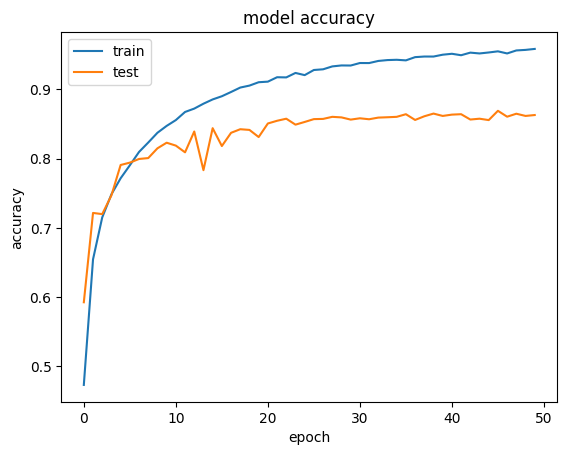

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

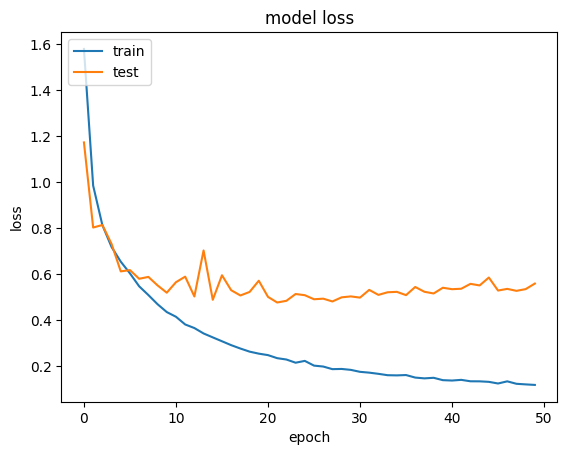

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()